In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import pyscenic
import adjustText
from pyscenic.rss import regulon_specificity_scores
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
sc.logging.print_header()

/home/jovyan/my-conda-envs/pyscenic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.3 pynndescent==0.5.8


# Goal
This notebook creates main fig 4f from output of 01.stable_regulons.ipynb (prev endo_scenic_multirun_compile.ipynb)
# Input
1. stable_regulons_rss.pk - mean regulon-celltype weights (prev regulons_stable_80pct_rss.csv)

In [3]:
path='../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/'

# plot main fig 5e

In [4]:
with open('stable_regulons_rss.pk', 'rb') as handle:
    rssnf = pickle.load(handle)
# this is almost identical (differences are likely due to rounding), figures are indistinguishable by eye (except positioning of labels that is stochastic and functions seems to have no seed option)
# path='../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/'
# rssnf = pd.read_csv(path+'/Data/Scenic/All200c/Output/regulons_stable_80pct_rss.csv',index_col=0).T


In [5]:
xcelltype = 'fetal_Capillary arterioles'
ycelltype = 'organoid_Capillary arterioles'
ntop = 20
topreg = sorted(list(set(rssnf[xcelltype].sort_values(ascending=False).index[:ntop]).union(rssnf[ycelltype].sort_values(ascending=False).index[:ntop])))
topreg

['BCL6B(+)',
 'BRF1(+)',
 'E2F4(+)',
 'ELF4(+)',
 'ELK3(+)',
 'ERF(+)',
 'ERG(+)',
 'ETV3L(+)',
 'FLI1(+)',
 'FOXK2(+)',
 'GATA2(+)',
 'HOXD10(+)',
 'IRF2(+)',
 'LTF(+)',
 'LYL1(+)',
 'MECOM(+)',
 'MLXIP(+)',
 'NKX3-1(+)',
 'PML(+)',
 'SMAD1(+)',
 'SOX17(+)',
 'SOX7(+)',
 'TAL1(+)']

Text(0.5, 1.0, 'Capillary arterioles regulon specificity score')

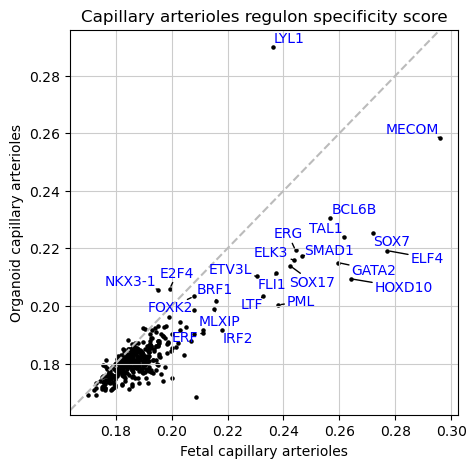

In [6]:
plt.rcParams['figure.figsize'] = [5, 5]
fig,ax = plt.subplots(1,1)
ax.scatter(rssnf[xcelltype], rssnf[ycelltype],c='black',s=5)
labs = [ax.text(rssnf.loc[c,xcelltype], rssnf.loc[c,ycelltype],c.replace('(+)',''),c='blue' )for c in topreg]
adjustText.adjust_text(
    labs,
    arrowprops=dict(arrowstyle='-', color='black')
)

ax.set_xlabel(xcelltype.replace('_',' ').capitalize())
ax.set_ylabel(ycelltype.replace('_',' ').capitalize())
ax.grid(c='#CCCCCC',linestyle='-')
ax.axline((0.2,0.2),slope=1,linestyle='--',c='#BBBBBB')
ax.set_title('Capillary arterioles regulon specificity score')

In [7]:
fig.savefig('../../../figures/paper.figures/5e.capillary_arterioles.regulons.scatterplot.pdf')